In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
import pandas as pd
import numpy as np

data = pd.read_csv("diabetes.csv")

desired_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = data[desired_columns]

shuffled_data = data.copy()

shuffled_data = pd.concat([shuffled_data] * 6, ignore_index=True)

shuffled_data = shuffled_data.sample(frac=1).reset_index(drop=True)


shuffled_data.to_csv("shuffled_diabetes.csv", index=False)

print("Data shuffled and saved to 'shuffled_diabetes.csv' file!")


Data shuffled and saved to 'shuffled_diabetes.csv' file!


In [23]:
df = pd.read_csv("shuffled_diabetes.csv")


In [24]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7       94             64             25       79  33.3   
1            1      102             74              0        0  39.5   
2            0      139             62             17      210  22.1   
3            7      119              0              0        0  25.2   
4            7      152             88             44        0  50.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.738   41        0  
1                     0.293   42        1  
2                     0.207   21        0  
3                     0.209   37        0  
4                     0.337   36        1  


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4608 entries, 0 to 4607
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               4608 non-null   int64  
 1   Glucose                   4608 non-null   int64  
 2   BloodPressure             4608 non-null   int64  
 3   SkinThickness             4608 non-null   int64  
 4   Insulin                   4608 non-null   int64  
 5   BMI                       4608 non-null   float64
 6   DiabetesPedigreeFunction  4608 non-null   float64
 7   Age                       4608 non-null   int64  
 8   Outcome                   4608 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 324.1 KB
None


In [26]:
print(df.describe())

       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  4608.000000  4608.000000    4608.000000    4608.000000  4608.000000   
mean      3.845052   120.894531      69.105469      20.536458    79.799479   
std       3.367749    31.955263      19.345301      15.943559   115.181448   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      62.000000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    30.500000   
75%       6.000000   140.250000      80.000000      32.000000   127.250000   
max      17.000000   199.000000     122.000000      99.000000   846.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  4608.000000               4608.000000  4608.000000  4608.000000  
mean     31.992578                  0.471876    33.240885     0.348958  
std       7.879881                  0.331149    11.753848     0.476692  
min  

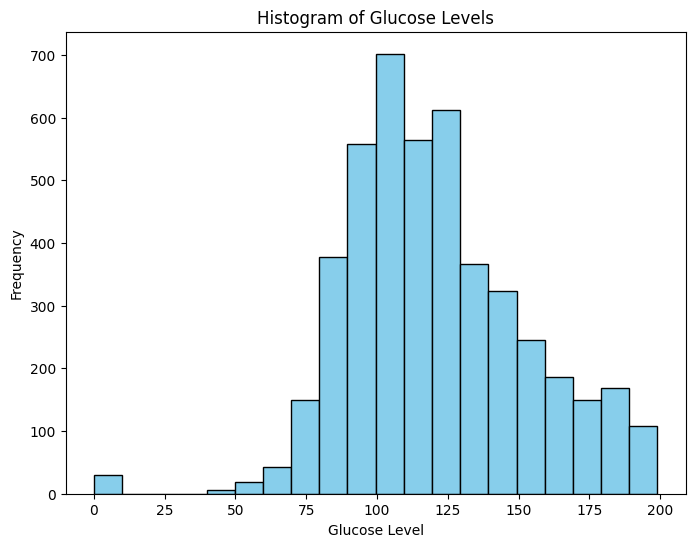

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(df['Glucose'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Glucose Levels')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()


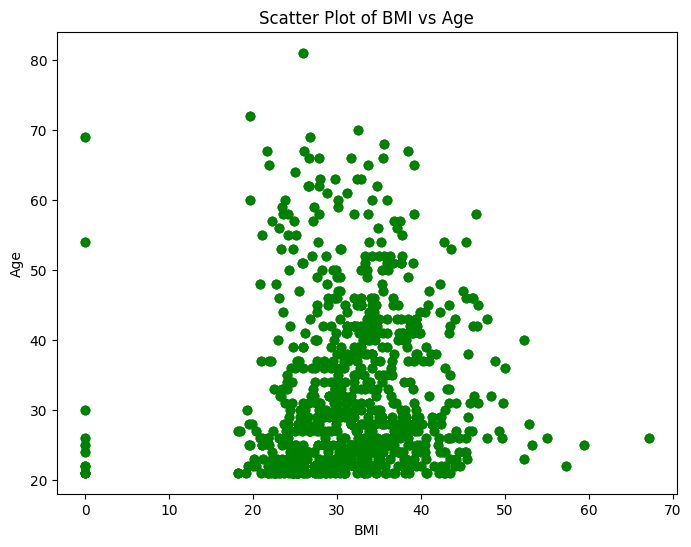

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(df['BMI'], df['Age'], color='green', alpha=0.5)
plt.title('Scatter Plot of BMI vs Age')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

<Figure size 800x600 with 0 Axes>

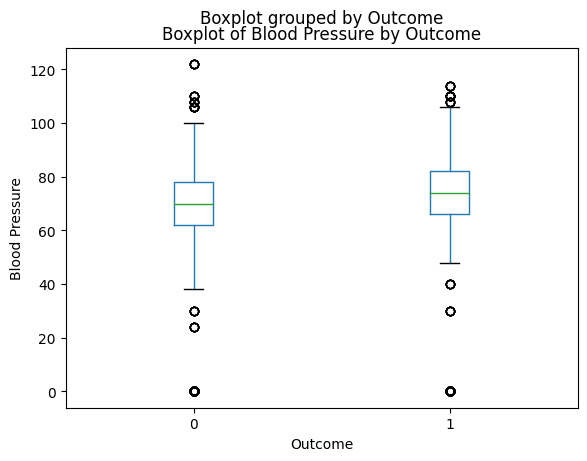

In [29]:
plt.figure(figsize=(8, 6))
df.boxplot(column='BloodPressure', by='Outcome', grid=False)
plt.title('Boxplot of Blood Pressure by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Blood Pressure')
plt.show()

In [16]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

data = pd.read_csv('shuffled_diabetes.csv')

print(data.columns)

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred)
    print(f'{name} F1 Score: {f1}')


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Logistic Regression F1 Score: 0.6358595194085028
Random Forest F1 Score: 1.0
Support Vector Machine F1 Score: 0.7874564459930313


In [22]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

data = pd.read_csv('shuffled_diabetes.csv')

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{name} F1 Score: {f1:.4f}')


Logistic Regression F1 Score: 0.6359
Random Forest F1 Score: 1.0000
Support Vector Machine F1 Score: 0.7875


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('shuffled_diabetes.csv')

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

accuracy_percentage = accuracy * 100
print(f'Best Random Forest Model Accuracy: {accuracy_percentage:.2f}%')


Best Random Forest Model Accuracy: 100.00%
